# Milestone 2

## Import

In [1]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
from ast import literal_eval
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
character=pd.read_table('./MovieSummaries/character.metadata.tsv',header=None)
movies=pd.read_table('./MovieSummaries/movie.metadata.tsv',header=None)
names=pd.read_csv('./MovieSummaries/name.clusters.txt',sep="\t",header=None)
summaries=pd.read_csv('./MovieSummaries/plot_summaries.txt',sep="\t",header=None)
tvtropes=pd.read_csv('./MovieSummaries/tvtropes.clusters.txt',sep="\t",header=None)

In [3]:
character=character.rename(columns={0:'wikipedia_movie_id',1:'rebase_movie_ID',3:'character_name',4:'Actor_DOB',5:'Actor_gender',6:'actor_height',7:'Actor_etnicity',8:'Actor_name',9:'Actor_age_at_movie_release',10:'Freebase_character_map'})
movies.rename(columns={0:'wikipedia_movie_id',1:'rebase_movie_ID',2:'Movie_name',3:'Movie_release',4:'Box_office_revenue',5:'Movie_runtime',6:'Movie_language',7:'Movie_country',8:'Movie_genre'},inplace=True)
names.rename(columns={0:'Character_names',1:'Freebase_ID'},inplace=True)
tvtropes.rename(columns={0:'Character_type',1:'ID_in_freebase_db'},inplace=True)
summaries.rename(columns={0:'wikipedia_movie_id',1:'Plot_summaries'},inplace=True)

In [4]:
tvtropes["dict_ID"]=[literal_eval(i) for i in tvtropes.ID_in_freebase_db]
tvtropes=pd.concat([tvtropes.drop(['dict_ID'], axis=1), tvtropes
                    ['dict_ID'].apply(pd.Series)], axis=1)

In [5]:
movies["American_movies"] = movies.Movie_country.apply(lambda x: int("United States of America" in x))

In [6]:
movies.groupby("American_movies").agg("count")["wikipedia_movie_id"].head()

American_movies
0    47333
1    34408
Name: wikipedia_movie_id, dtype: int64

Almost half of the dataset are American movies

In [7]:
dates = []
for i in range(1934, 1966):
    dates.append(str(i))

In [8]:
movies["USA_Hays_date"]=movies.Movie_release.apply(lambda x: int(not not set(str(x).split("-")) & set(dates)))


In [9]:
print('There were %d movies produced in America during Hays period!' %len(movies[(movies.USA_Hays_date == 1)&(movies.American_movies == 1)]))

There were 7881 movies produced in America during Hays period!


In [10]:
movies["Indian_movies"] = movies.Movie_country.apply(lambda x: int("India" in x))

In [11]:
movies.groupby("Indian_movies").agg("count")["wikipedia_movie_id"].head()

Indian_movies
0    73330
1     8411
Name: wikipedia_movie_id, dtype: int64

In [12]:
#define text file to open
crime = open('word_list/crime.txt', 'r', encoding="latin1")

#read text file into list
crime_words = crime.read()

In [13]:
crime2 = open('word_list/crime2.txt', 'r', encoding="latin1")

#read text file into list
crime_words2 = crime2.read()
crime_words2 = set(crime_words2.lower().split("\n"))

In [14]:
sexuality = open('word_list/sexuality.txt', 'r', encoding="latin1")

#read text file into list
sex_words = sexuality.read()

In [15]:
sex_words = set(sex_words.lower().split("\n"))

In [16]:
crime_words=crime_words.replace(", ",",").replace(" ,",",")
#crime_words=crime_words
crime_words = set(crime_words.lower().split(","))

In [17]:
movie_plot = movies.merge(summaries, on="wikipedia_movie_id")

In [18]:

movie_plot["nbr_sex_words"] = movie_plot.Plot_summaries.apply(lambda x: len(list(set(str(x).lower().replace(".","").replace(",","").split(" ")) & sex_words)))

In [19]:
movie_plot["nbr_crime_words"] = movie_plot.Plot_summaries.apply(lambda x: len(list(set(str(x).lower().replace(".","").replace(",","").split(" ")) & crime_words2)))
movie_plot.head()
movies_USA=movie_plot[movie_plot.American_movies != 0]

In [20]:
movies_USA = movies_USA.sort_values(by="Movie_release", ascending = True)
movies_USA.head()

,wikipedia_movie_id,rebase_movie_ID,Movie_name,Movie_release,Box_office_revenue,Movie_runtime,Movie_language,Movie_country,Movie_genre,American_movies,USA_Hays_date,Indian_movies,Plot_summaries,nbr_sex_words,nbr_crime_words
13274,73372,/m/0jq3g,Blacksmith Scene,1893,NaN,0.566667,"{""/m/06ppq"": ""Silent film""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",1,0,0,The scene is all filmed from a stationary came...,0,1
34733,10109752,/m/02q23xk,Miss Jerry,1894-10-09,NaN,NaN,"{""/m/06ppq"": ""Silent film""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",1,0,0,After finding out that her father is suffering...,0,0
41943,10104497,/m/02q1zd3,Corbett and Courtney Before the Kinetograph,1894-11-17,NaN,NaN,"{""/m/06ppq"": ""Silent film""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",1,0,0,James J. Corbett and Peter Courtney both take ...,0,0
4269,11453521,/m/02rd7zz,The Ball Game,1898-05-20,NaN,NaN,"{""/m/06ppq"": ""Silent film""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",1,0,0,The film contains footage of an 1898 baseball ...,0,0
10947,2654820,/m/07vq4_,The Nearsighted School Teacher,1898-07,NaN,NaN,{},"{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",1,0,0,In this case it is the schoolmaster who comes ...,0,2


In [21]:
movies_USA["Movie_release"] = movies_USA.Movie_release.apply(lambda x: float(str(x)[0:4:1]))


In [22]:
movies_USA.head()

,wikipedia_movie_id,rebase_movie_ID,Movie_name,Movie_release,Box_office_revenue,Movie_runtime,Movie_language,Movie_country,Movie_genre,American_movies,USA_Hays_date,Indian_movies,Plot_summaries,nbr_sex_words,nbr_crime_words
13274,73372,/m/0jq3g,Blacksmith Scene,1893.0,NaN,0.566667,"{""/m/06ppq"": ""Silent film""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",1,0,0,The scene is all filmed from a stationary came...,0,1
34733,10109752,/m/02q23xk,Miss Jerry,1894.0,NaN,NaN,"{""/m/06ppq"": ""Silent film""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",1,0,0,After finding out that her father is suffering...,0,0
41943,10104497,/m/02q1zd3,Corbett and Courtney Before the Kinetograph,1894.0,NaN,NaN,"{""/m/06ppq"": ""Silent film""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",1,0,0,James J. Corbett and Peter Courtney both take ...,0,0
4269,11453521,/m/02rd7zz,The Ball Game,1898.0,NaN,NaN,"{""/m/06ppq"": ""Silent film""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",1,0,0,The film contains footage of an 1898 baseball ...,0,0
10947,2654820,/m/07vq4_,The Nearsighted School Teacher,1898.0,NaN,NaN,{},"{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",1,0,0,In this case it is the schoolmaster who comes ...,0,2


In [23]:
movies_USA_crime = movies_USA.groupby("Movie_release")['nbr_crime_words'].agg(['mean'])
movies_USA_sex = movies_USA.groupby("Movie_release")['nbr_sex_words'].agg(['mean'])

In [24]:
movies_USA_crime.head()

,mean
Movie_release,
1893.0,1.0
1894.0,0.0
1898.0,1.0
1900.0,1.0
1901.0,1.0


In [25]:
movies_USA_sex.head()

,mean
Movie_release,
1893.0,0.0
1894.0,0.0
1898.0,0.0
1900.0,0.0
1901.0,0.0


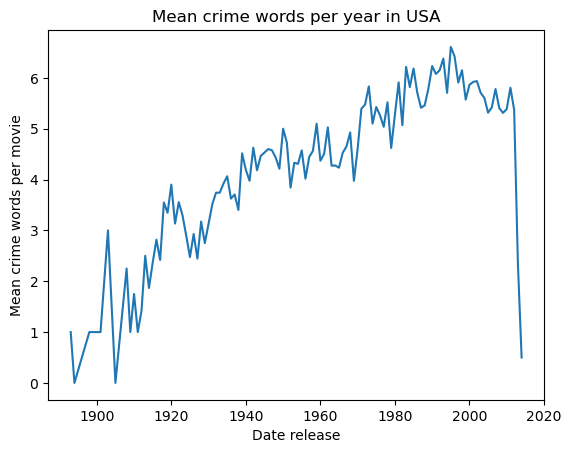

In [26]:
plt.plot(movies_USA_crime.index, movies_USA_crime["mean"])

plt.xlabel('Date release')
plt.ylabel('Mean crime words per movie')
plt.title('Mean crime words per year in USA');

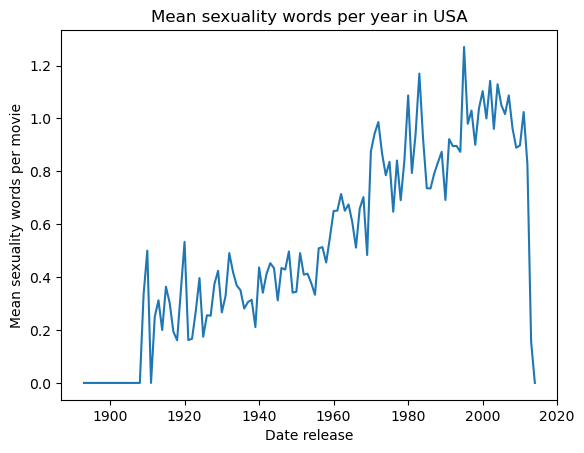

In [27]:
plt.plot(movies_USA_sex.index, movies_USA_sex["mean"])

plt.xlabel('Date release')
plt.ylabel('Mean sexuality words per movie')
plt.title('Mean sexuality words per year in USA');

## 3 Segregation USA

In [28]:
character.sample(20)

,wikipedia_movie_id,rebase_movie_ID,2,character_name,Actor_DOB,Actor_gender,actor_height,Actor_etnicity,Actor_name,Actor_age_at_movie_release,Freebase_character_map,11,12
289408,27947248,/m/0chtsjr,2009,NaN,NaN,NaN,NaN,NaN,Pavel Zedníček,NaN,/m/0cjc5z5,NaN,/m/0cjc5z8
392009,8067034,/m/026q88w,2002,NaN,NaN,NaN,NaN,NaN,József Forkas,NaN,/m/0bfl_sl,NaN,/m/0bfl_sj
174331,10106919,/m/02q212f,2002,NaN,NaN,F,NaN,NaN,Carol Locatell,NaN,/m/040b_gw,NaN,/m/096cks
40750,5016250,/m/0czyxs,2009-02-23,Mick Jagger,NaN,M,NaN,NaN,Steven Stojkovic,NaN,/m/05kg3bk,/m/05kg3bn,/m/05kg3bw
236114,18800331,/m/04gkmnc,1977,NaN,1945-03-18,F,NaN,NaN,Susan Tyrrell,31.0,/m/0cg42bw,NaN,/m/02hmn8
304798,7416129,/m/0kv6_q,1965-06-09,Inspector Wilson,1924-10-15,M,NaN,/m/0d7wh,Nigel Green,40.0,/m/0cg4p4k,/m/0lb6zzw,/m/0dv23l
218438,15837920,/m/03y00n3,1977,NaN,1935-09-23,M,NaN,NaN,Prem Chopra,41.0,/m/0gz2xhm,NaN,/m/03fw60
158549,13165463,/m/02z9hqn,2009-06-27,NaN,1976-05-25,M,NaN,NaN,J. Michael Tatum,33.0,/m/0gc_2jj,NaN,/m/04f4wrf
323061,5444283,/m/0dm51w,1944-02-11,NaN,1879-06-03,F,1.600,NaN,Alla Nazimova,NaN,/m/02vckqn,NaN,/m/0447px
157262,69625,/m/0j3n5,1955,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/m/0k5lkm,NaN,/m/0m593
